# Assignment 1
## Applied Machine Learning (BUAN 6341)


Deliverables:

- Submit your answers to conceptual questions (described in another .pdf file) in a pdf file.
- Write down your codes and discussions in the given cells described in this file.
    - Cells for coding are denoted as "YOUR CODE HERE" 
    - Cells for discussions are denoted as "YOUR DISCUSSIONS HERE". Include "#" before each line of your discussions to comment out your wordings (i.e., not considered as code).
    - If you need more cells to check temporary results, add a cell using the "+" button or shortcut "esc + b".
- Submit three files: .pdf, .ipynb, and .html to eLearning.
    - Hint: to obtain .html from Jupyter Notebook, go to File => Download As => HTML (Recommended method)
    - Alternatively, to get .html, go to File => Print Preview. Then in the preview page, right click => Save as => In the Save as type, choose "HTML Only"


In [1]:
NAME = "Pooja Patel"

### Meet the Data and the Setting

##### Background  
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles.

##### The Dataset

We will be using the daily version of the Capital Bikeshare System dataset from the UCI Machine Learning Repository. This data set contains information about the daily count of bike rental checkouts in Washington, D.C.’s bikeshare program between 2011 and 2012. It also includes information about the weather and seasonal/temporal features for that day (like whether it was a weekday).
- **day:** Day of the record (relative to day 1:2011-01-01)
- **season:** Season (1:spring, 2:summer, 3:fall, 4:winter)
- **weekday:** Day of the week (0=Sunday, 6=Saturday)
- **workingday:** If day is neither weekend nor holiday is 1, otherwise is 0.
- **weathersit:**<br>
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered
clouds
- **temp:** Normalized temperature in Celcius
- **windspeed:** Normalized wind speed
- **casual:** Count of checkouts by casual/non-registered users
- **registered:** Count of checkouts by registered users
- **cnt:** Total checkouts

##### Practice Prep
The cells below imports basic packages as well as the bike-sharing dataset. The original dataset is loaded as Pandas DataFrame, and is named as 'daily'. Run and read through the cells below to obtain a general understanding of the data.

In [16]:
%matplotlib inline 
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [17]:
import pandas as pd
daily = pd.read_csv("day.csv")
daily.head()

,day,season,weekday,workingday,weathersit,temp,windspeed,casual,registered,cnt
0,1,1,6,0,2,0.344167,0.160446,331,654,985
1,2,1,0,0,2,0.363478,0.248539,131,670,801
2,3,1,1,1,1,0.196364,0.248309,120,1229,1349
3,4,1,2,1,1,0.200000,0.160296,108,1454,1562
4,5,1,3,1,1,0.226957,0.186900,82,1518,1600


In [18]:
print(daily.columns)

Index(['day', 'season', 'weekday', 'workingday', 'weathersit', 'temp',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')


**Question 1 : Getting Insights from Visualization. (10 pts)**

The block of code below helps to visualize **the daily count of bikes that were checked out by casual users (y)** against **temperature (x)**. The figure uses color to specify whether a day is a working day (yellow) or a non-working day (purple). 

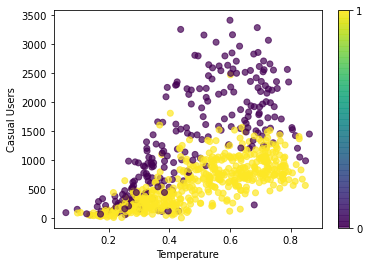

In [19]:
## CODE FOR VISUALIZATION - DO NOT MODIFY ##

x = daily['temp']
y = daily['casual']
cat = daily['workingday']
plt.scatter(x,y, c = cat, alpha = 0.7)
plt.xlabel('Temperature')
plt.ylabel('Casual Users')
cbar = plt.colorbar(ticks=[0, 1])

## Regression

In this section, you are supposed to complete THREE regression models, some in conjunction with grid search and CV. First, run the cells below to complete the data splitting step. 

In [20]:
# Define X and y
var = ['temp','windspeed','season', 'weekday', 'workingday', 'weathersit']
X = daily[var]
y = daily['cnt']

In [21]:
# Data splitting for training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Question 2: Linear Regression (30 pts)**

- Train a linear regression model. Report and specify clearly the estimated coefficients and intercept.   
  *Hint: use print function to specify the result reported is the intercept.*
- Obtain the predicted y for (1) test set and (2) training set. Store the results properly.
- Calculate and use print function to report (1) the MSE for test set and (2) the MSE for training set.

In [22]:
# Train the model and report coefficients
# YOUR CODE HERE 
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

np.set_printoptions(precision=4, suppress=True)
print("Coef:", model.coef_), print("Intercept:",np.array(model.intercept_))


Coef: [ 5245.4857 -1995.7357   412.6628    76.7743   132.2098  -800.6094]
Intercept: 2093.4087280168687


(None, None)

In [23]:
## Predict y for training and test set
# YOUR CODE HERE

y_test_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)


In [24]:
## Calculate and report the MSE for training and test
# YOUR CODE HERE

e = y_test - y_test_pred

MSE_test = np.mean(e**2)
print("Test MSE: ", MSE_test)

e_train = y_train - y_train_pred
MSE_train = np.mean(e_train**2)
print("Train MSE: ", MSE_train)


Test MSE:  1816812.3742340647
Train MSE:  1852849.4373569074


**Question 3: Polynomial Regression (20 pts)**

- Train a Polynomial regression model with grid search and 10-fold cross-validation. Let the grid of the hyperparameter be: [1,2,3]. Leave other parameters as default.
- Report the hyperparameter chosen (i.e., the degree selected) and the mean of validation score of the chosen model.
- Obtain the chosen model's unbiased performance (based on default measure, R-squared).

In [25]:
# Train the model, and report the results
# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

param_poly = {'polynomialfeatures__degree' :  range(1,4)  }
param_poly = { 'polynomialfeatures__degree' : [1, 2, 3] }

grid_poly = PolynomialFeatures()
grid_lr = LinearRegression()
pipe_grid = make_pipeline( grid_poly, grid_lr )


grid_poly_reg = GridSearchCV( pipe_grid , param_poly , cv = 10)
grid_poly_reg.fit(X_train, y_train)

print()
print("Hyperparameter chosen: ",grid_poly_reg.best_params_)
print("Mean Validation Score: ", grid_poly_reg.best_score_)
print("Unbiased performance: ", grid_poly_reg.score(X_test, y_test))




Hyperparameter chosen:  {'polynomialfeatures__degree': 1}
Mean Validation Score:  0.46151790928788133
Unbiased performance:  0.5285823895780062


**Question 4: Ridge Regression (20 pts)** 

- Train a Ridge regression model with grid search and 10-fold cross-validation. Let the grid of the hyperparameter be: [0.01,0.1,1,10]. Leave other parameters as default.
- Report the hyperparameter chosen and the mean of validation score of the chosen model.
- Obtain the chosen model's unbiased performance (based on default measure, R-squared).
- Report the coefficient of the chosen model (including the intercept).

In [26]:
## YOUR CODE HERE - Train the model and report the results
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


para_ridge = {'alpha' :  [0.01, 0.1, 1, 10]}  

ridge = Ridge()
grid_ridge_reg = GridSearchCV(ridge, param_ridge, cv=10)
grid_ridge_reg.fit(X_train, y_train)


print("Hyperparameter: ", grid_ridge_reg.best_params_)
print("Mean Validation Score: ",grid_ridge_reg.best_score_)
print("Unbiased Performance Measure: ", grid_ridge_reg.score(X_test, y_test))
print("Coefficient: ", grid_ridge_reg.best_estimator_.coef_)
print("Intercept: ", grid_ridge_reg.best_estimator_.intercept_)


Hyperparameter:  {'alpha': 0.1}
Mean Validation Score:  0.4616657974382356
Unbiased Performance Measure:  0.5279997473021947
Coefficient:  [ 5214.785  -1938.8546   415.2188    76.7825   133.117   -801.9327]
Intercept:  2092.845844722562
